# World Happiness Report
- [world happiness](https://www.kaggle.com/unsdsn/world-happiness)
- Predict the happiness score

## Problem Statement

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
Our aim here is to analyze the data set in detail and visualize it with a wide range of visualization tools.

Here are some inspirations:
- What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? 
- How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports? 
- Did any country experience a significant increase or decrease in happiness?

## Exploratory Data Analysis

The goal of this section is to gain an understanding of our data in order to inform what we do in the feature engineering section.

We begin our exploratory data analysis by loading modules.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#We then load the data, which we have downloaded from the Kaggle website. 
#We choose the data in 2015 as an example
data=pd.read_csv('2015.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
print("Data Info:\n",(data.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
print("Data Describe:\n",(data.describe()))

Data Describe:
        Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    

In [5]:
#rename data columns
data = data.rename(columns={'Happiness Rank': 'Happiness_Rank', 
                            'Happiness Score': 'Happiness_Score', 
                            'Standard Error': 'Standard_Error', 
                            'Economy (GDP per Capita)': 'Economy_GDP_Capital',
                            'Health (Life Expectancy)': 'Life_Expectancy',
                            'Trust (Government Corruption)': 'Government_Corruption',
                            'Dystopia Residual': 'Dystopia_Residual'})

In [6]:
#check if there is null in the data
pd.isnull(data).sum()

Country                  0
Region                   0
Happiness_Rank           0
Happiness_Score          0
Standard_Error           0
Economy_GDP_Capital      0
Family                   0
Life_Expectancy          0
Freedom                  0
Government_Corruption    0
Generosity               0
Dystopia_Residual        0
dtype: int64

In [7]:
data.dropna()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_Capital,Family,Life_Expectancy,Freedom,Government_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
#show all the countries
data.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [9]:
print(data['Country'].value_counts())

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64


In [10]:
#show all the regions
data.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [11]:
print(data['Region'].value_counts())

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


### Visualization

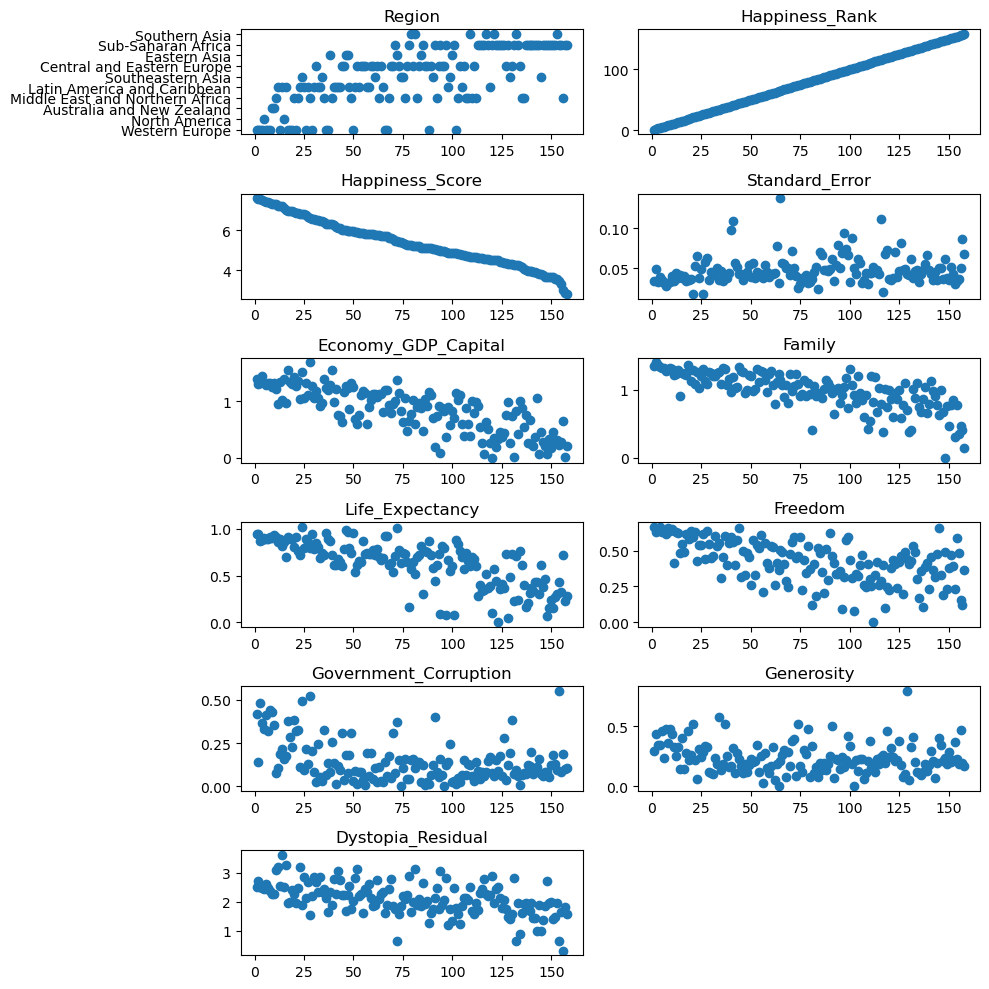

In [12]:
#create scatter plots for different features
data_filter=data.iloc[:,1:]
data_filter.columns
for i, col in enumerate(data_filter.columns.values):
    plt.subplot(6, 2, i+1)
    plt.scatter(np.arange(1,159), data[col].values.tolist())
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

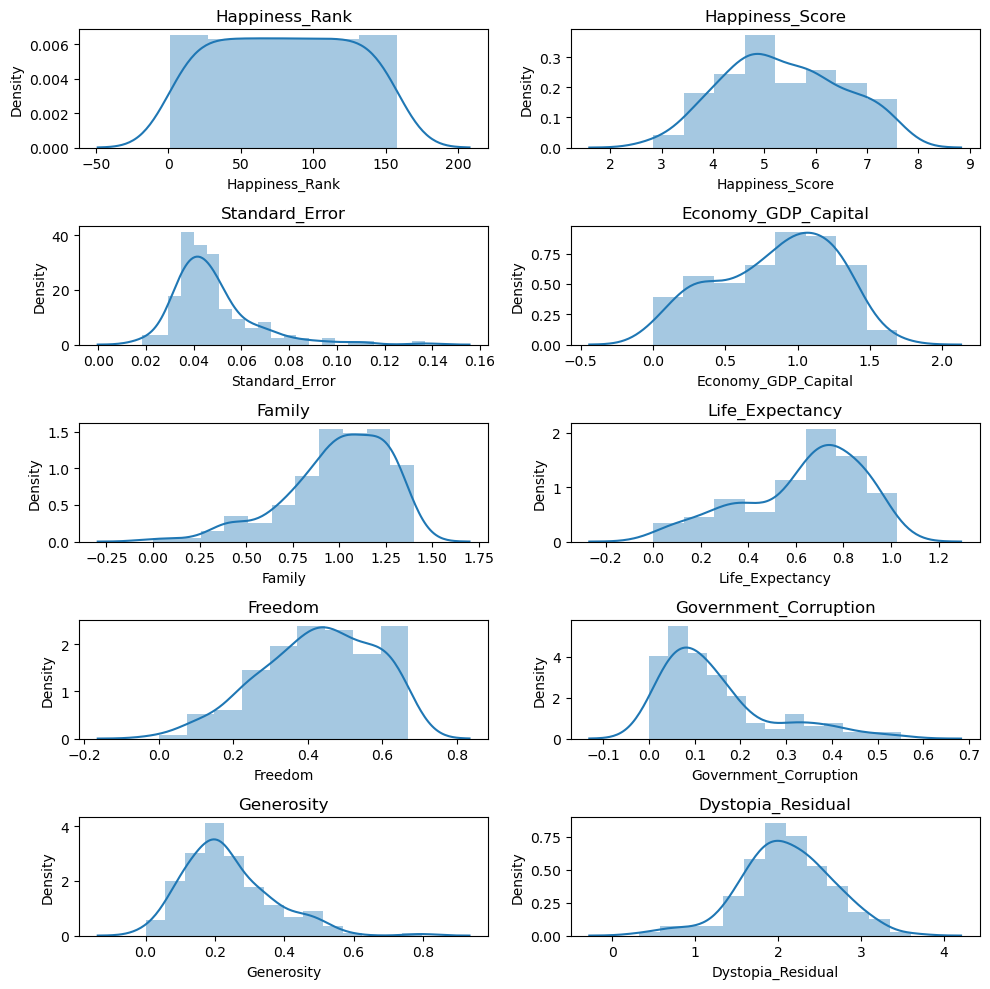

In [13]:
#show the density for different features
for i,col in enumerate(data.columns[2:]):
    plt.subplot(5,2 ,i+1)
    sns.distplot(data[col])
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

[Text(0, 0, 'Western Europe'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Australia and New Zealand'),
 Text(3, 0, 'Middle East and Northern Africa'),
 Text(4, 0, 'Latin America and Caribbean'),
 Text(5, 0, 'Southeastern Asia'),
 Text(6, 0, 'Central and Eastern Europe'),
 Text(7, 0, 'Eastern Asia'),
 Text(8, 0, 'Sub-Saharan Africa'),
 Text(9, 0, 'Southern Asia')]

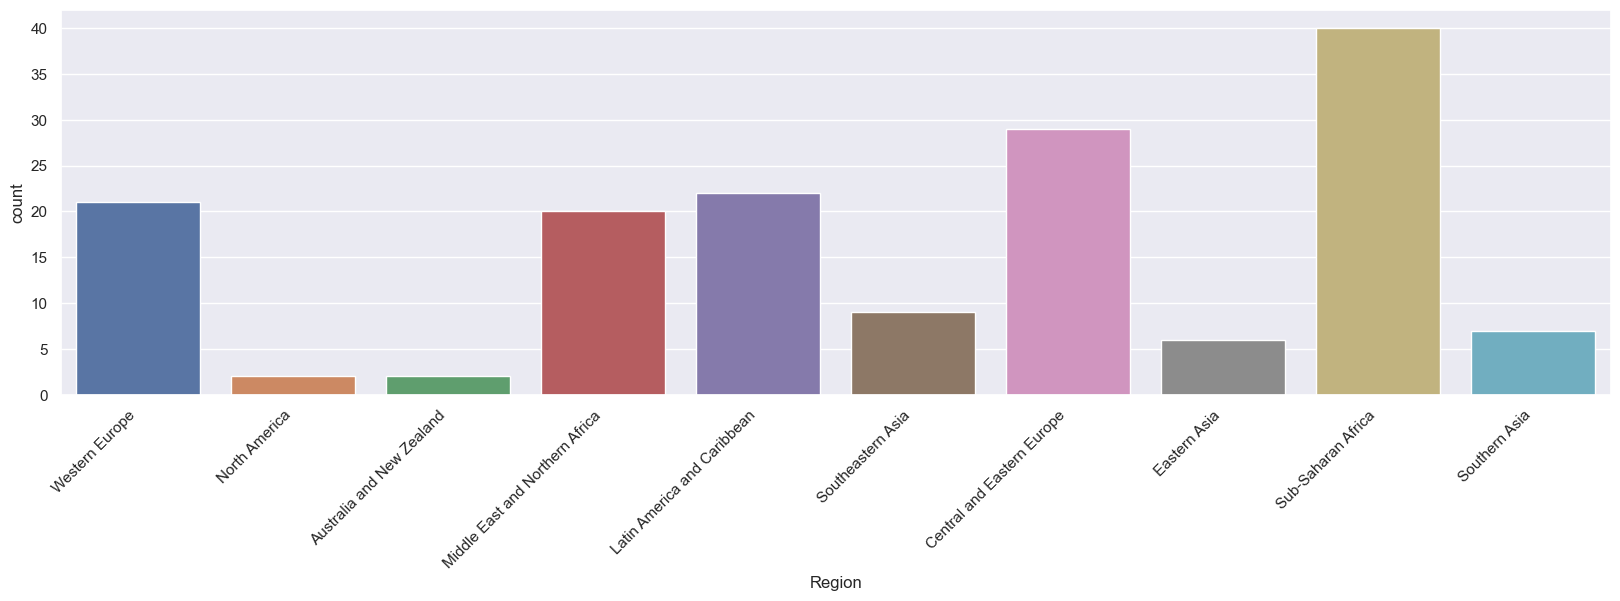

In [14]:
#show the countplot for regions
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data['Region'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

Sub-Saharan Africa has the most countries in the data.

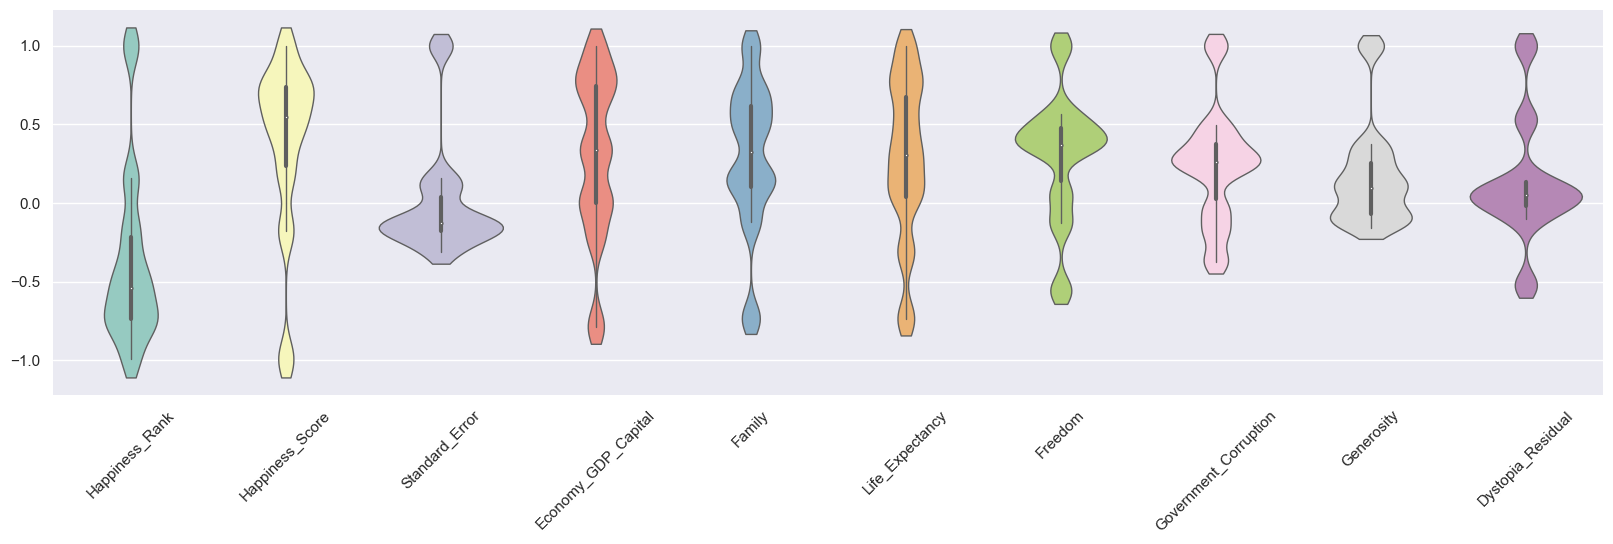

In [15]:
# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=data.corr(), palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45)
plt.show()

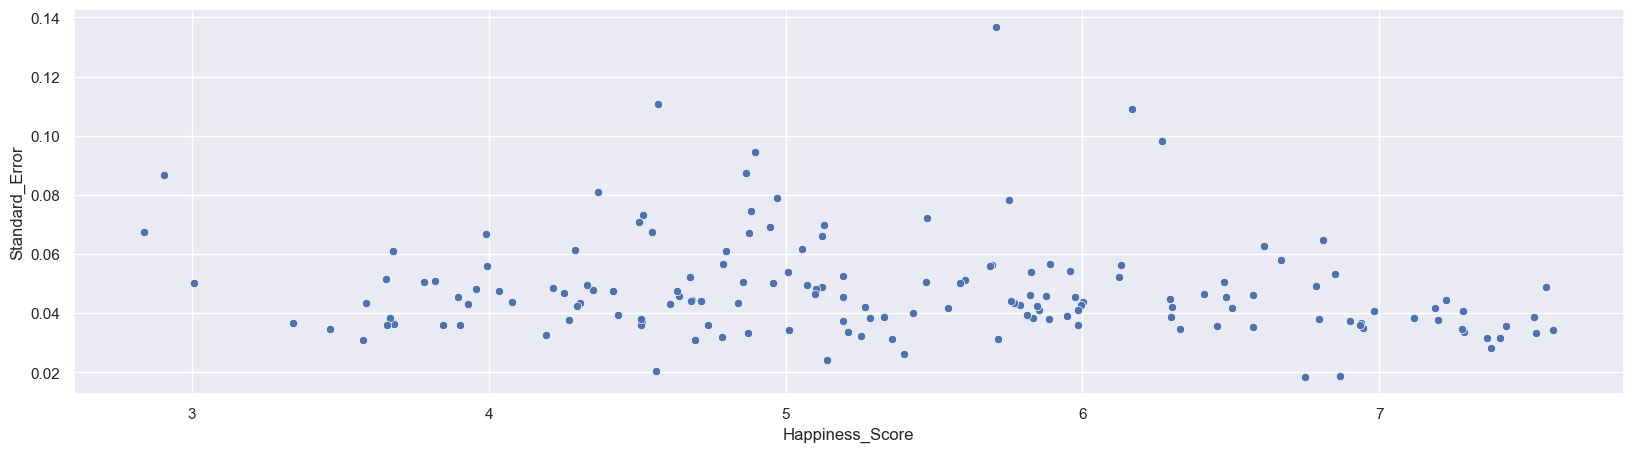

In [16]:
#show the relationship between standard error and happiness score
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Happiness_Score", y="Standard_Error",palette=cmap, sizes=(15, 5),
                     data=data)
plt.show()

In [17]:
Economy_GDP_Capital=[]
values_region=data.Region.value_counts().values
for i,region in enumerate(data.Region.value_counts().index):
    Economy_GDP_Capital.append(sum(data[data['Region']==region].Economy_GDP_Capital)/values_region[i])

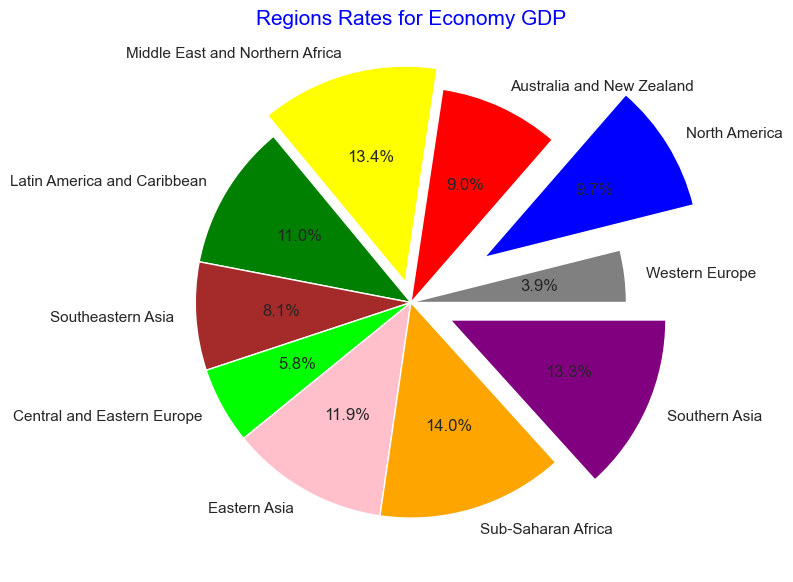

In [18]:
#use Pie Chart to show economy over different regions
colors = ['grey','blue','red','yellow','green','brown','lime','pink','orange','purple']
explode = [0,0.4,0,0.1,0,0,0,0,0,0.2]
plt.figure(figsize = (7,7))
plt.pie(Economy_GDP_Capital, explode=explode, labels=data['Region'].unique(), colors=colors, autopct='%1.1f%%')
plt.title('Regions Rates for Economy GDP',color = 'blue',fontsize = 15)
plt.show()

Sub-Saharan Africa has the highest economy rates.

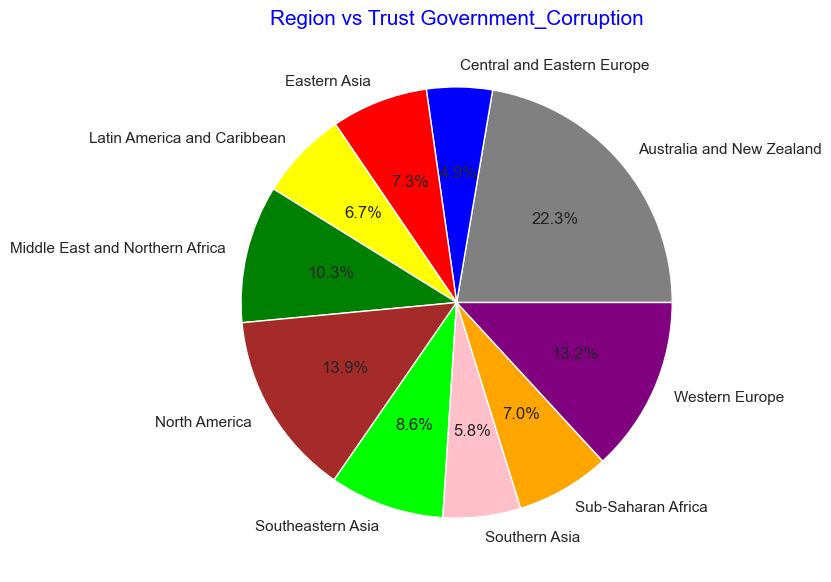

In [19]:
# use Pie Chart to show Trust Government Corruption
colors = ['grey','blue','red','yellow','green','brown','lime','pink','orange','purple']
explode = [0,0,0,0,0,0,0,0,0,0]
plt.figure(figsize = (7,7))
plt.pie(data.groupby('Region')['Government_Corruption'].mean().values, explode=explode, labels=data.groupby('Region')['Government_Corruption'].mean().index, colors=colors, autopct='%1.1f%%')
plt.title('Region vs Trust Government_Corruption',color = 'blue',fontsize = 15)
plt.show()

Australia and New Zealand has the highest Trust Government Corruption.

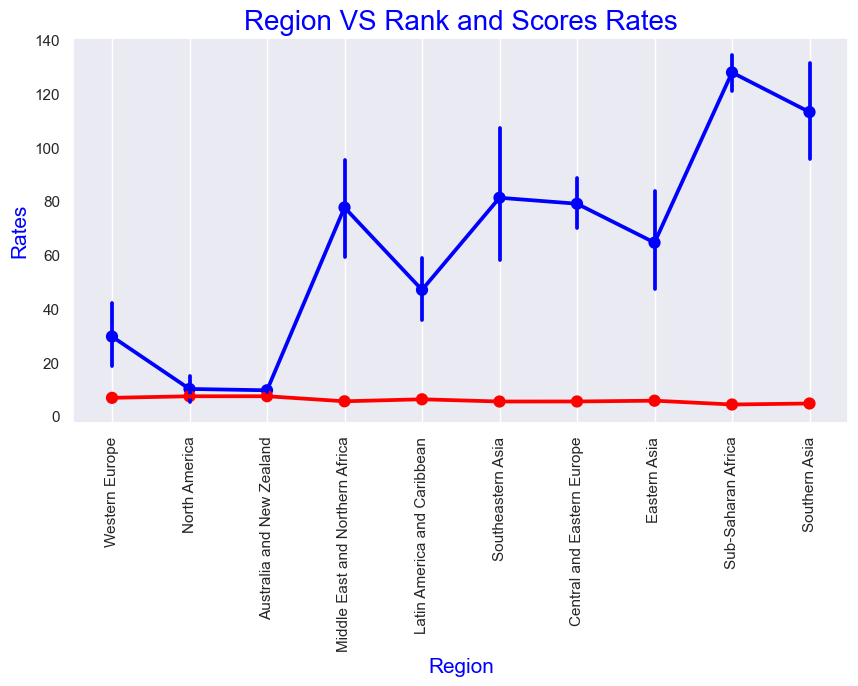

In [20]:
#show happiness score and happiness rank over region
f,ax1=plt.subplots(figsize=(10,5))
sns.pointplot(x=data.Region,y=data.Happiness_Rank,data=data,color='blue',alpha=0.8,label='Happiness Rank')
sns.pointplot(x=data.Region,y=data.Happiness_Score,data=data,color='red',alpha=0.8,label='Happiness Score')
plt.xlabel('Region',fontsize=15,color='blue')
plt.ylabel('Rates',fontsize=15,color='blue')
plt.title('Region VS Rank and Scores Rates',fontsize=20,color='blue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Sub-Saharan Africa has the highest happiness rank.

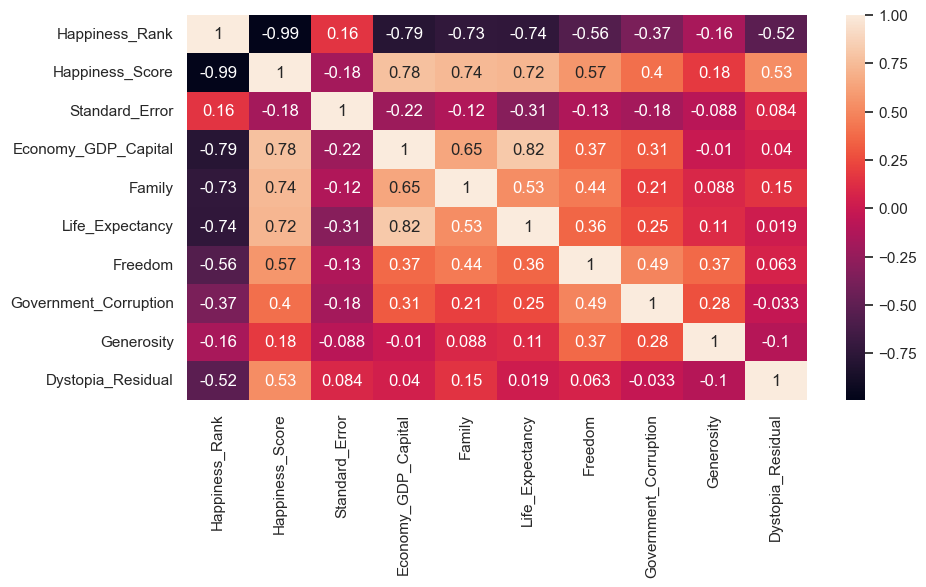

In [21]:
#show the correlation between features
ax=plt.subplots(figsize=(10,5))
ax = sns.heatmap(data.iloc[:,2:].corr(),annot=True)
plt.show()

- Happiness rank and Happiness Score are negatively correlated.
- Economy, Family, Life expectancy, freedom, trust and dystopia residual are positively correlated with happiness score.

## Data cleaning and Model training

In [22]:
#Drop country value because there is only one order of a value and a value.
data=data.drop('Country',axis=1)
#Create a new life_expectancy ,75% will be treated as 1 and 0 will be treated as 0.
data['Life_Expectancy']=[1 if healt_value>0.75 else 0 for healt_value in data.Life_Expectancy]
data_healt_life=data['Life_Expectancy']
data=data.drop('Life_Expectancy',axis=1)

In [23]:
#Happiness Rank value Because it is an ordered value, we need to delete it.
data=data.drop('Happiness_Rank',axis=1)

In [24]:
#There is more than one region value. Make all the regions sorted.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Region']=le.fit_transform(data['Region'])

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,data_healt_life,test_size=0.2,random_state=0)

In [26]:
#use the StandardScaler function#
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [27]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [28]:
#rename the columns
reduced_data_train = pd.DataFrame(X_train, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8','Dim9'])
reduced_data_test = pd.DataFrame(X_test, columns=['Dim1', 'Dim2','Dim3','Dim4','Dim5','Dim6','Dim7','Dim8','Dim9'])
X_train=reduced_data_train
X_test=reduced_data_test

In [29]:
#created a combination of features between different features to make different experiments. 
combine_features_list=[
    ('Dim1','Dim2','Dim3'),
    ('Dim4','Dim5','Dim6','Dim7'),
    ('Dim7','Dim8','Dim9'),
    ('Dim4','Dim3','Dim2','Dim1')
]

### Logistic Regression

In [30]:
parameters=[
{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gslog=GridSearchCV(LogisticRegression(penalty='l2', solver='liblinear'),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test'),
    ]
    
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)    
    basari=cross_val_score(estimator=LogisticRegression(penalty='l1', solver='liblinear'),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50) 
   

('Dim1', 'Dim2', 'Dim3')
**************************************************
Best parameters set:
{'C': 0.5, 'penalty': 'l1', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        83
           1       0.78      0.67      0.72        43

    accuracy                           0.83       126
   macro avg       0.81      0.79      0.80       126
weighted avg       0.82      0.83      0.82       126

**************************************************
Train Confusion Matrix:
[[75  8]
 [14 29]]
**************************************************
Test Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.89      0.73      0.80        11

    accuracy                           0.88        32
   mac

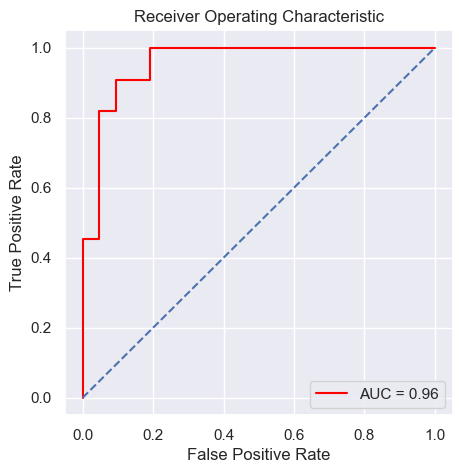

Accurancy: 0.875
Logistic train score: 0.8412698412698413
Logistic test score: 0.875

[[17  4]
 [ 0 11]]


In [31]:
lr=LogisticRegression(C=0.1,penalty='l1', solver='liblinear',random_state=0)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_proba=lr.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy:',accuracy_score(y_test, y_pred))
print("Logistic train score:",format(lr.score(X_train, y_train)))
print("Logistic test score:",format(lr.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)

### K-Nearest Neighbors

In [32]:
parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 7}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.85      0.99      0.92        83
           1       0.97      0.67      0.79        43

    accuracy                           0.88       126
   macro avg       0.91      0.83      0.86       126
weighted avg       0.89      0.88      0.87       126

**************************************************
Train Confusion Matrix:
[[82  1]
 [14 29]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        21
           1       0.80      0.36      0.50        11

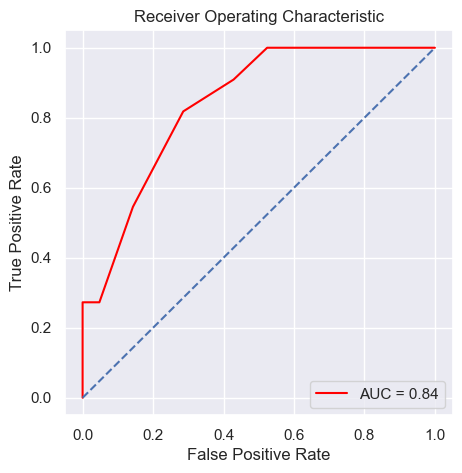

Accurancy:: 0.75
KNN train score: 0.8650793650793651
KNN test score: 0.75

[[18  3]
 [ 5  6]]


In [33]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=9)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy::',accuracy_score(y_test, y_pred))
print("KNN train score:",format(knn.score(X_train, y_train)))
print("KNN test score:",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)


In [34]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.8409090909090909, 0.7696969696969695, 0.8166666666666668, 0.8340909090909091, 0.8250000000000001, 0.8424242424242426, 0.8257575757575758, 0.818939393939394, 0.8575757575757578, 0.8030303030303031, 0.8265151515151515, 0.8265151515151516, 0.8340909090909093, 0.8265151515151516, 0.8265151515151516, 0.834848484848485]


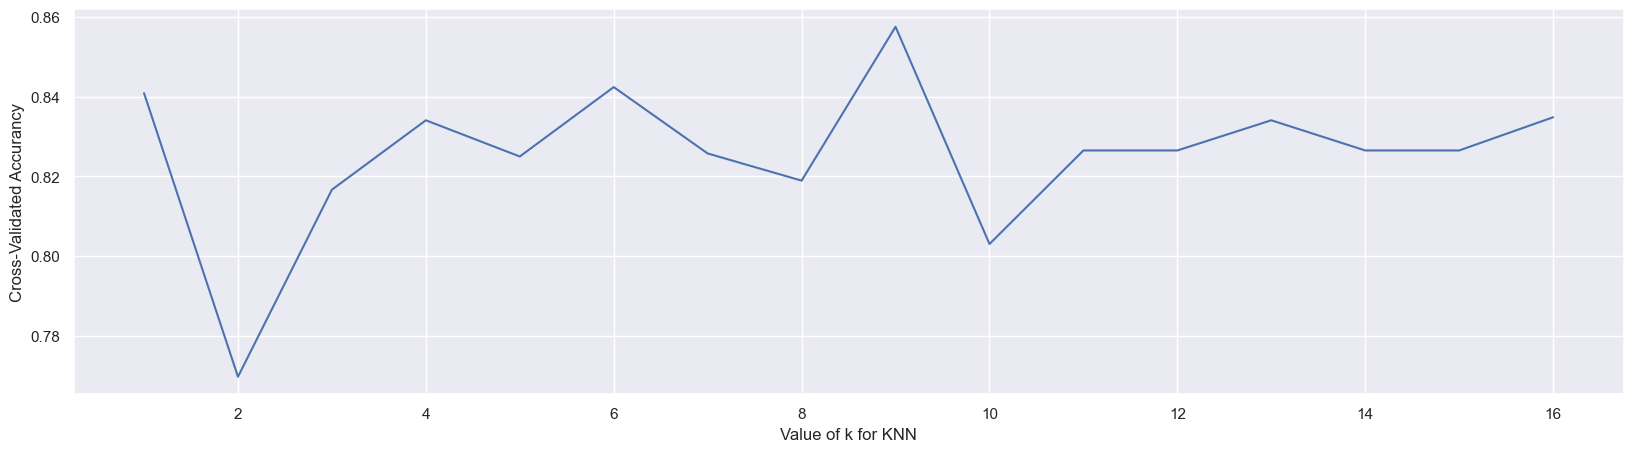

In [35]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

### SVC

In [36]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'C': 2, 'degree': 2, 'gamma': 0.9, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        83
           1       0.97      0.74      0.84        43

    accuracy                           0.90       126
   macro avg       0.93      0.87      0.89       126
weighted avg       0.91      0.90      0.90       126

**************************************************
Train Confusion Matrix:
[[82  1]
 [11 32]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        21
           1       0.80      0.36      0.50

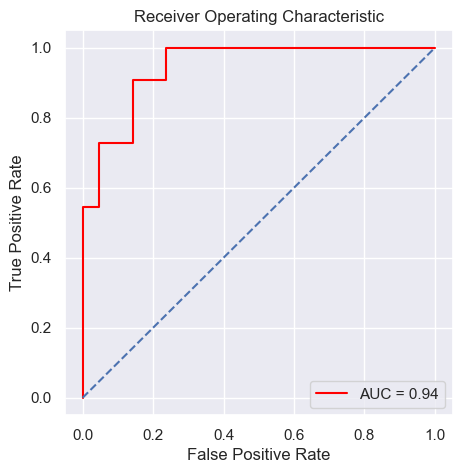

Accurancy: 0.875
SVC train score: 0.9444444444444444
SVC test score: 0.875

[[20  1]
 [ 3  8]]


In [37]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy:',accuracy_score(y_test, y_pred))
print("SVC train score:",format(svc.score(X_train, y_train)))
print("SVC test score:",format(svc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)


### Gradient Boosting Regressor

In [38]:
parameters = [
{
    'learning_rate': [0.01, 0.02, 0.002],
    'random_state': [0],
    'n_estimators': np.arange(3, 20)
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
   
    gbc = GridSearchCV(GradientBoostingClassifier(), parameters, scoring='accuracy')
    gbc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(gbc.best_params_)
    print("*"*50)
    predictions = [
    (gbc.predict(X_train_set), y_train, 'Train'),
    (gbc.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=GradientBoostingClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'learning_rate': 0.02, 'n_estimators': 15, 'random_state': 0}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        83
           1       1.00      0.58      0.74        43

    accuracy                           0.86       126
   macro avg       0.91      0.79      0.82       126
weighted avg       0.88      0.86      0.85       126

**************************************************
Train Confusion Matrix:
[[83  0]
 [18 25]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        21
           1       1.00      0.27      0.43        11

    accuracy      

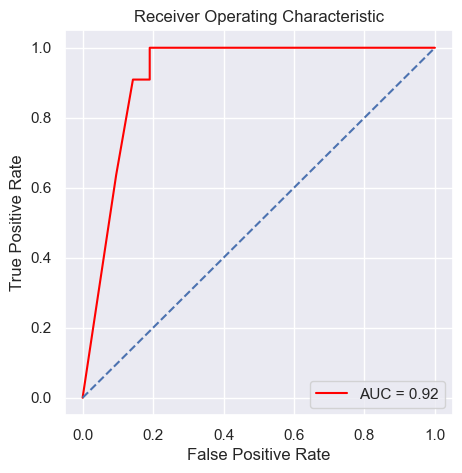

Accurancy: 0.8125
GradientBoostingClassifier train score: 0.873015873015873
GradientBoostingClassifier test score: 0.8125

[[19  2]
 [ 4  7]]


In [39]:
gbc=GradientBoostingClassifier(learning_rate=0.02,n_estimators=15,random_state=0)
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
y_proba=gbc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy:',accuracy_score(y_test, y_pred))
print("GradientBoostingClassifier train score:",format(gbc.score(X_train, y_train)))
print("GradientBoostingClassifier test score:",format(gbc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)


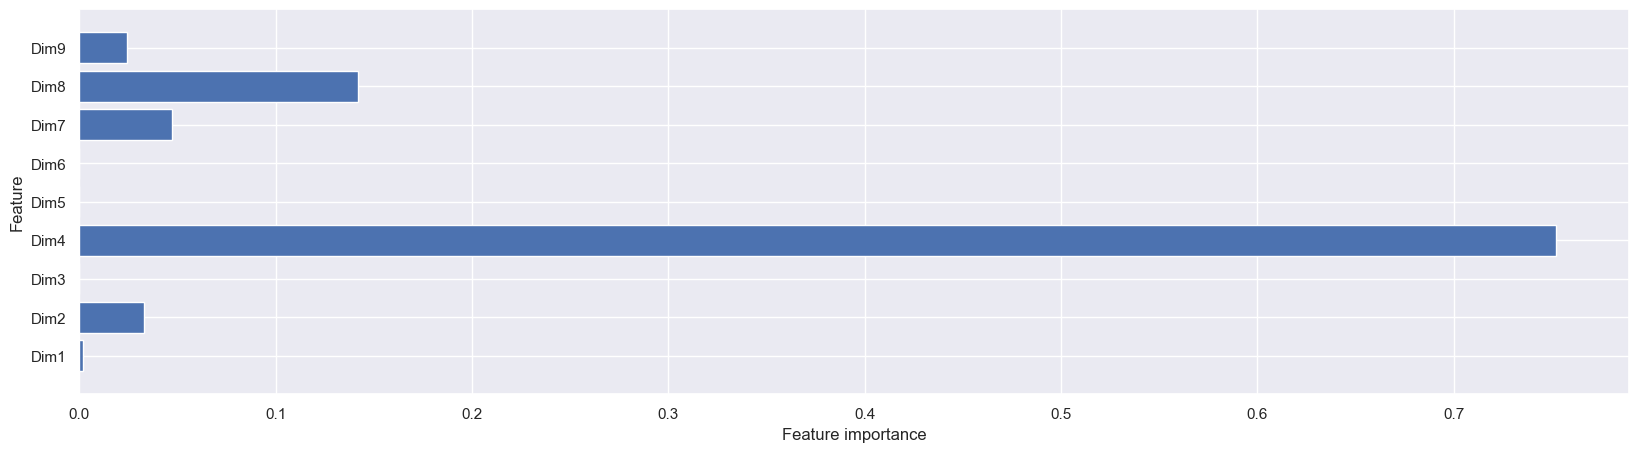

In [40]:
#show the importance of features
plot_feature_importances(gbc)
plt.show()

Economy_GDP_Capital is the most important feature according to Gradient Boosting Classifier.

### Random Forest

In [41]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(X_train_set, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(X_train_set), y_train, 'Train'),
        (tree.predict(X_test1_set), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    print("*"*50)    
    basari=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 18, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        83
           1       0.97      0.72      0.83        43

    accuracy                           0.90       126
   macro avg       0.92      0.85      0.88       126
weighted avg       0.91      0.90      0.89       126

**************************************************
Train Confusion Matrix:
[[82  1]
 [12 31]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        21
           1       0.83      0.45      0.59        11

 

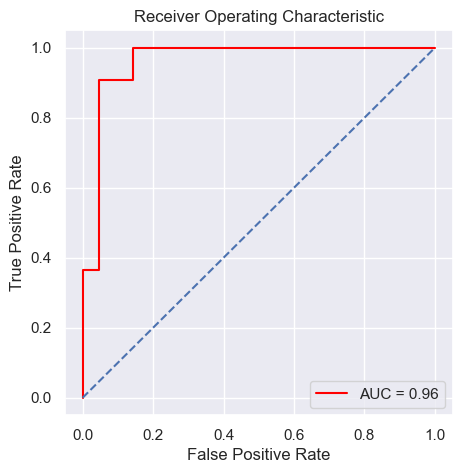

Accurancy: 0.875
RandomForestClassifier train score: 0.9841269841269841
RandomForestClassifier test score: 0.875

[[18  3]
 [ 1 10]]


In [42]:
rfc=RandomForestClassifier(max_depth=6,min_samples_split=4,n_estimators=18,random_state=3)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy:',accuracy_score(y_test, y_pred))
print("RandomForestClassifier train score:",format(rfc.score(X_train, y_train)))
print("RandomForestClassifier test score:",format(rfc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)


In [43]:
for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))

TEST set score w/ 1 estimators: 0.75
TEST set score w/ 2 estimators: 0.75
TEST set score w/ 3 estimators: 0.6875
TEST set score w/ 4 estimators: 0.75
TEST set score w/ 5 estimators: 0.71875
TEST set score w/ 6 estimators: 0.71875
TEST set score w/ 7 estimators: 0.75
TEST set score w/ 8 estimators: 0.84375
TEST set score w/ 9 estimators: 0.84375
TEST set score w/ 10 estimators: 0.875


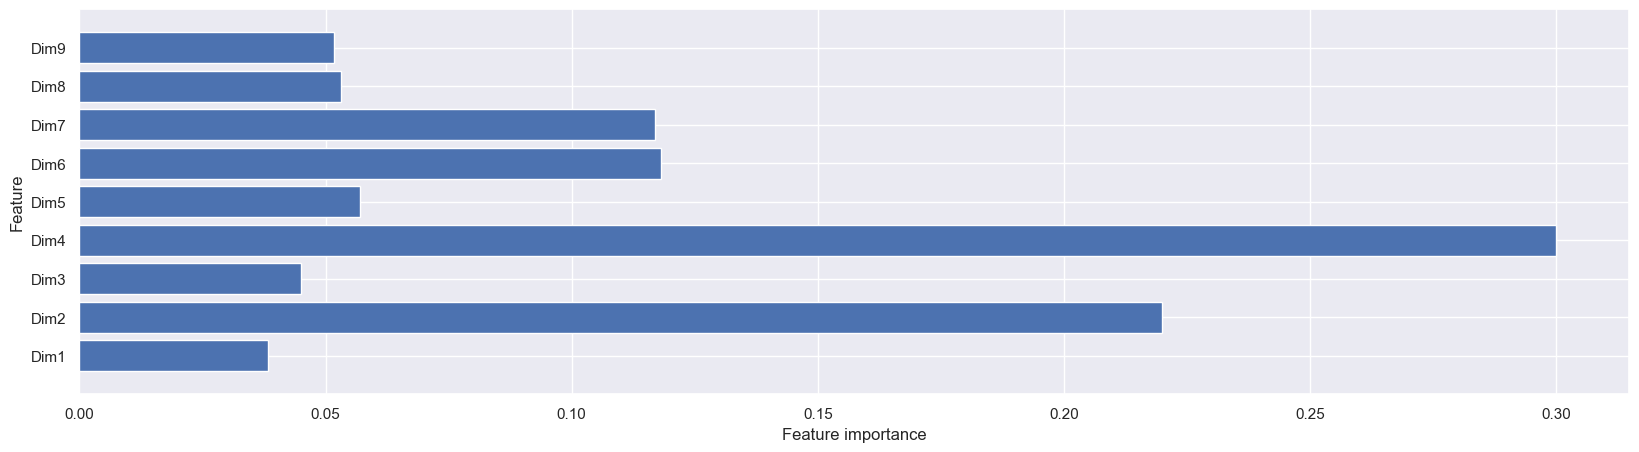

In [44]:
#show the importance of features
plot_feature_importances(rf)
plt.show()

Economy_GDP_Capital is the most important feature according to Random Forest Classifier.